In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

# import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

#### Import compiled_SUPERsnow_flat.nc

In [2]:
fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow_flat.nc'

#ds full
ds = xr.open_dataset(fname,  chunks={'z': 1000000})
ds.close()

#~~~~~~~~~~~ds peak
dpeak = ds.isel(time=[0,7,18,30,42,49]) #0,7,22,28,41,49]
dpeak.close()

ds = dpeak
ds.close()
ds

<xarray.Dataset>
Dimensions:  (time: 6, z: 298708138)
Coordinates:
  * time     (time) datetime64[ns] 2013-04-03 2014-04-07 ... 2018-04-23
    mask     (z) uint8 dask.array<shape=(298708138,), chunksize=(1000000,)>
    dem      (z) float32 dask.array<shape=(298708138,), chunksize=(1000000,)>
    veg      (z) float32 dask.array<shape=(298708138,), chunksize=(1000000,)>
Dimensions without coordinates: z
Data variables:
    snow     (time, z) int16 dask.array<shape=(6, 298708138), chunksize=(6, 1000000)>

In [3]:
#store flat arrays
# pk_13 = ds.snow.sel(time='2013-04-03').values
# pk_14 = ds.snow.sel(time='2014-04-07').values
# pk_15 = ds.snow.sel(time='2015-03-06').values
# pk_16 = ds.snow.sel(time='2016-04-16').values
# pk_17 = ds.snow.sel(time='2017-04-01').values
# pk_18 = ds.snow.sel(time='2018-04-23').values


In [9]:
def one_to_one(lidar_date_str_1, lidar_date_str_2):
    
    '''array values from DataSet'''

    s1 = ds.snow.sel(time=lidar_date_str_1).values
    s1_gt_zero = s1 > 0
    s2 = ds.snow.sel(time= lidar_date_str_2).values
    s2_gt_zero = s2 > 0
    
    print(s1.shape, s2.shape)
    '''scatter plot'''
    ax = plt.scatter(s2[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s2[s2_gt_zero]),
                     s1[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s1[s1_gt_zero]), 
                     alpha=0.01) #[:1000000][:1000000]

    plt.grid()
    plt.xlabel('{}'.format(lidar_date_str_2[:4]))
    plt.ylabel('{}'.format(lidar_date_str_1[:4]))
    

#     plt.plot([0, ??], [0, ??], '-k', linewidth = 2)
    
    '''mean w/o zeros'''
#     txt_mean = plt.annotate('{:.0f} vs {:.0f} cm.'.format(np.nanmean(s1[s1_gt_zero]/10), np.nanmean(s2[s2_gt_zero]/10)), xy=(?,?))

#      '''R2 value'''      
    
    

(298708138,) (298708138,)


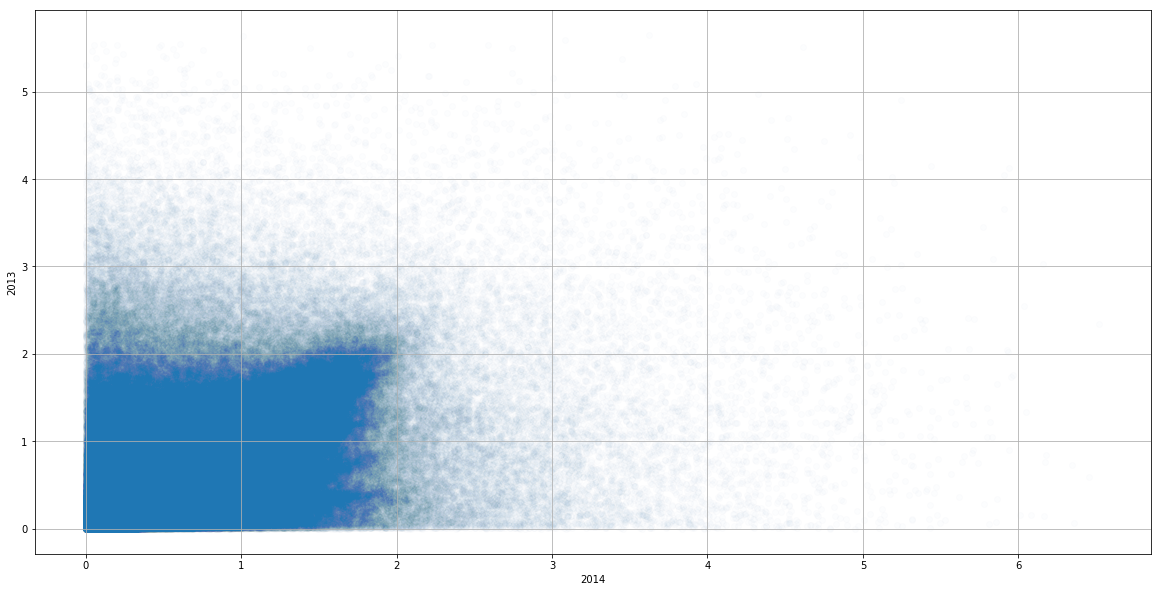

In [10]:
plt.figure(figsize=(20,10))
w = one_to_one('2013-04-03', '2014-04-07')

In [6]:
s1 = ds.snow.sel(time='2013-04-03').values
s1_gt_zero = s1 > 0
s2 = ds.snow.sel(time='2014-04-07').values
s2_gt_zero = s2 > 0


s1.close()
s2.close()

AttributeError: 'numpy.ndarray' object has no attribute 'close'

## sample bits

In [ ]:
# txt_mean = '{:.0f} vs {:.0f} cm.'.format(np.nanmean(s1[s1_gt_zero]/10), np.nanmean(s2[s2_gt_zero]/10))
# txt_mean

# txt_mean = plt.annotate('{:.0f} vs {:.0f} cm.'.format(np.nanmean(s1[s1_gt_zero]/10), np.nanmean(s2[s2_gt_zero]/10)), xy=(?,?))
    
                                                            

In [ ]:
# foo=np.nanmean(s1[s1_gt_zero]/10)
# print('{:.0f}'.format(foo))